In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = './data/final_adjusted_crowd_dataset.csv'
df = pd.read_csv(file_path)
df.head()

,Longitude,Latitude,Speed,Distance,Time,Acc X,Acc Y,Acc Z,Heading,gyro_x,gyro_y,gyro_z,label
0,73.822661,18.501627,0.0,0.0,18-45-12,0.046402,-0.137178,-0.282934,352.0,-0.036306,-0.008226,-0.023416,0
1,73.822661,18.501627,0.0,0.0,18-45-12,-0.136978,0.365242,0.108889,352.0,0.035776,-0.009448,0.009570,0
2,73.822661,18.501627,0.0,0.0,18-45-13,-0.045355,-0.103340,-0.534985,352.0,-0.011871,-0.027774,0.003462,0
3,73.822661,18.501627,0.0,0.0,18-45-13,0.242089,0.072761,-0.350396,352.0,-0.017980,0.002769,-0.005091,0
4,73.822661,18.501627,0.0,0.0,18-45-13,-0.230234,0.011765,-0.494085,352.0,0.011342,0.003380,0.006516,0


In [2]:
print(df['Time'].head(10))  # Check for any inconsistencies in the time format


0    18-45-12
1    18-45-12
2    18-45-13
3    18-45-13
4    18-45-13
5    18-45-13
6    18-45-13
7    18-45-13
8    18-45-13
9    18-45-13
Name: Time, dtype: object


In [3]:
# Ensure that the 'Time' column is properly formatted by replacing hyphens with colons
print('Converting Time column to datetime format...')

# Replace any hyphens with colons to match the HH:MM:SS format
df['Time'] = df['Time'].str.replace('-', ':')

# Now convert the column to datetime, assuming the corrected format is HH:MM:SS
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')

# Check the conversion
print(df[['Time']].head())


Converting Time column to datetime format...
                 Time
0 1900-01-01 18:45:12
1 1900-01-01 18:45:12
2 1900-01-01 18:45:13
3 1900-01-01 18:45:13
4 1900-01-01 18:45:13



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Longitude  14249 non-null  float64       
 1   Latitude   14249 non-null  float64       
 2   Speed      14249 non-null  float64       
 3   Distance   14249 non-null  float64       
 4   Time       14249 non-null  datetime64[ns]
 5   Acc X      14249 non-null  float64       
 6   Acc Y      14249 non-null  float64       
 7   Acc Z      14249 non-null  float64       
 8   Heading    14249 non-null  float64       
 9   gyro_x     14249 non-null  float64       
 10  gyro_y     14249 non-null  float64       
 11  gyro_z     14249 non-null  float64       
 12  label      14249 non-null  int64         
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 1.4 MB

Missing Values Count:
Longitude    0
Latitude     0
Speed        0
Distance     0
Time         0
Acc X 

C:\Users\disha\AppData\Local\Temp\ipykernel_18784\1718884381.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time'].fillna(method='ffill', inplace=True)
C:\Users\disha\AppData\Local\Temp\ipykernel_18784\1718884381.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Time'].fillna(method='ffill', inplace=True)


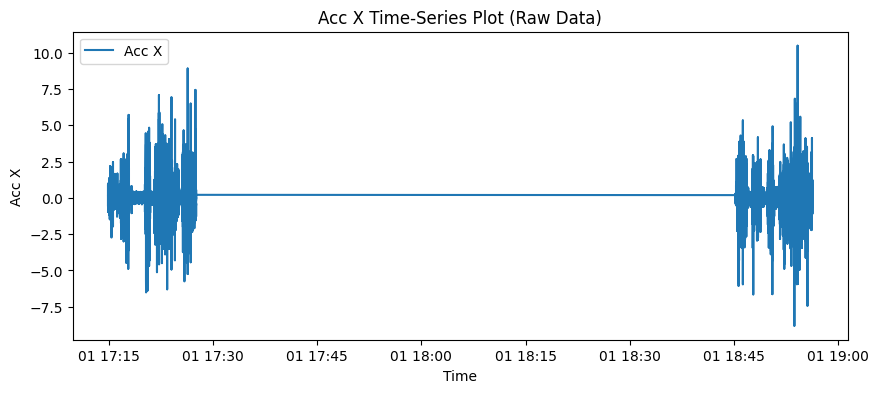

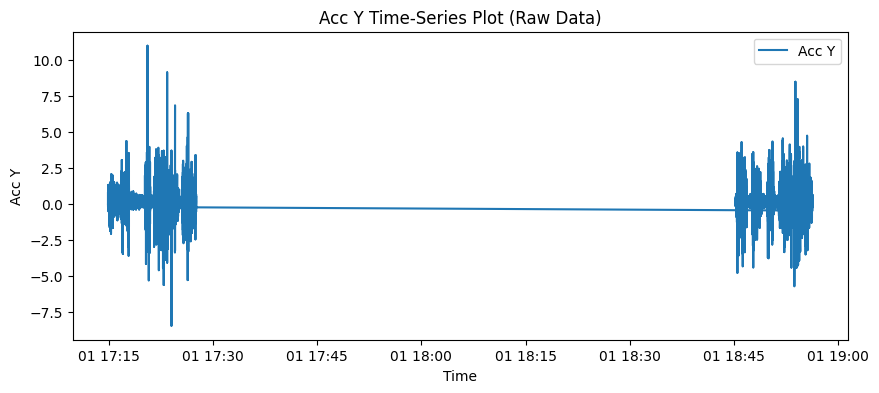

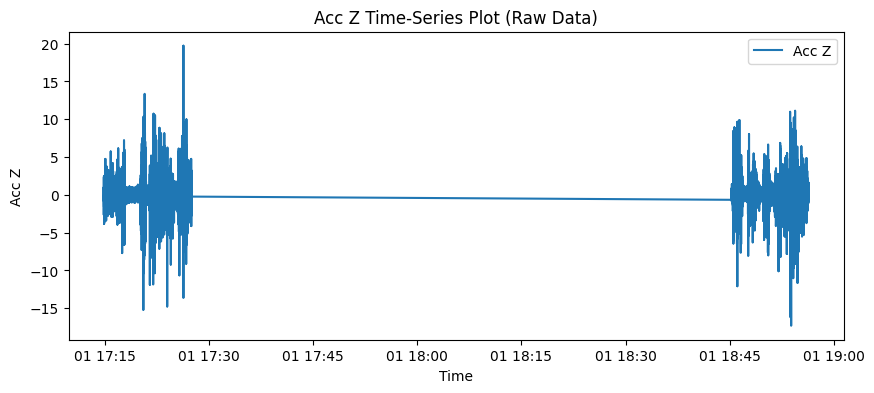

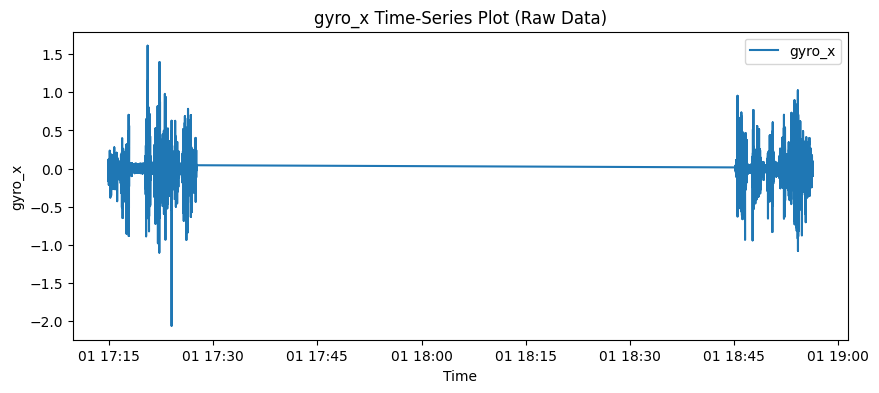

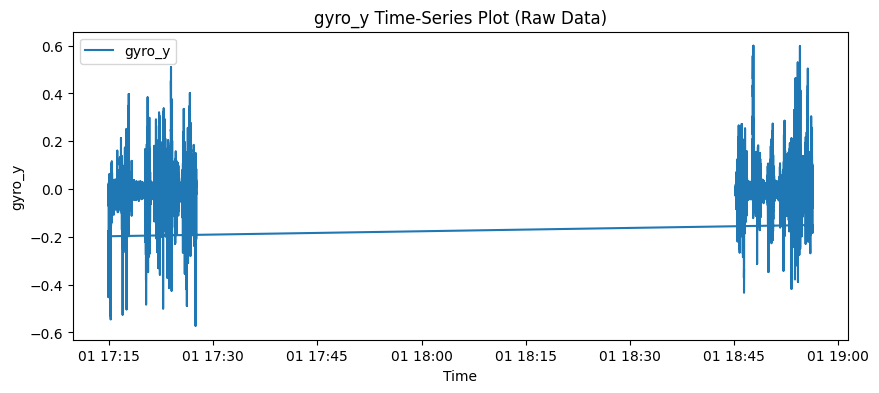

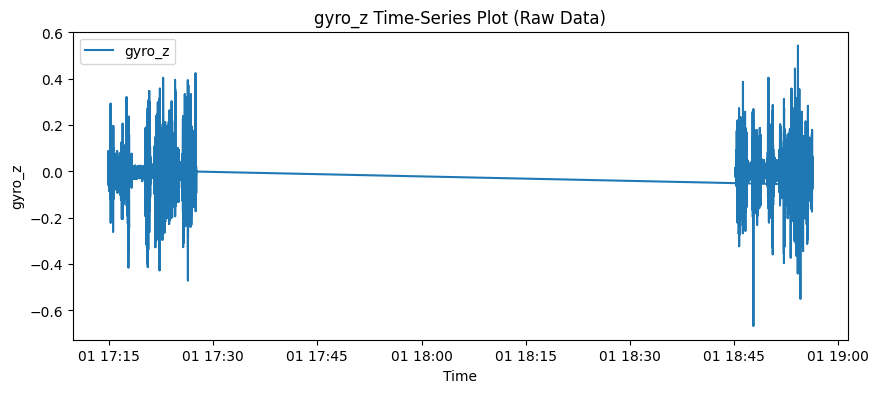


Summary Statistics for All Sensors:
              Acc X         Acc Y         Acc Z        gyro_x        gyro_y  \
count  14246.000000  14246.000000  14246.000000  14246.000000  14246.000000   
mean      -0.001137      0.180237     -0.023576     -0.001319     -0.006521   
std        1.030982      0.837260      1.768811      0.141039      0.087850   
min       -8.805807     -8.476646    -17.320633     -2.062668     -0.571912   
25%       -0.378820     -0.126690     -0.701545     -0.046690     -0.033272   
50%       -0.013089      0.167227     -0.025761     -0.002219     -0.005783   
75%        0.362683      0.478868      0.674922      0.044939      0.021706   
max       10.488632     11.013258     19.725800      1.611687      0.599585   

             gyro_z  
count  14246.000000  
mean      -0.003200  
std        0.068017  
min       -0.666047  
25%       -0.027224  
50%       -0.002179  
75%        0.024088  
max        0.542856  


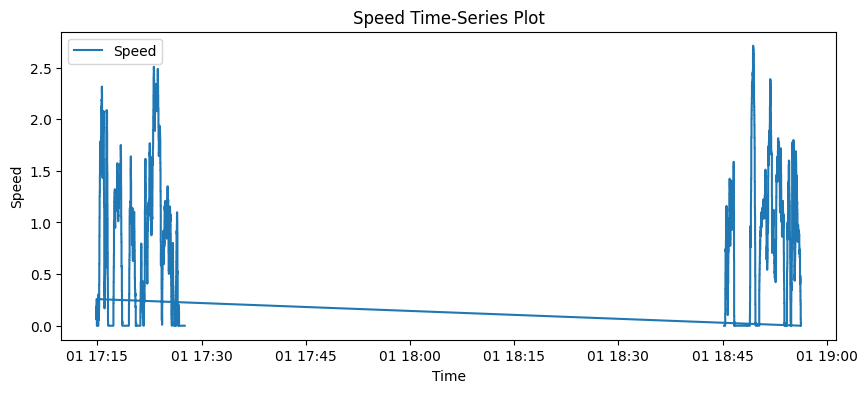

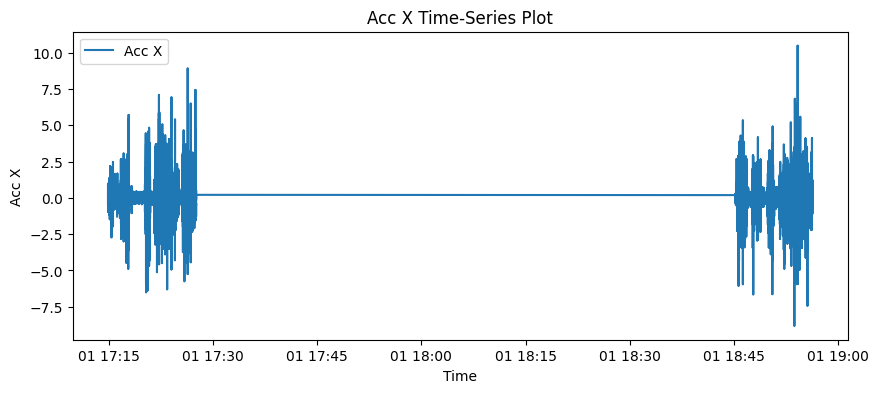

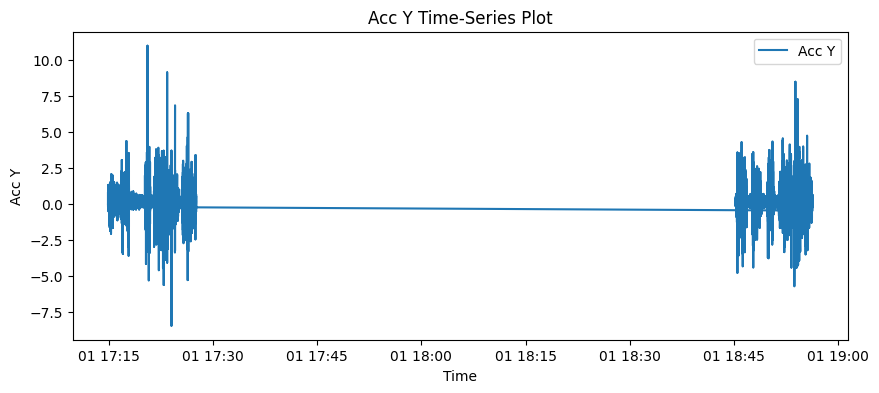

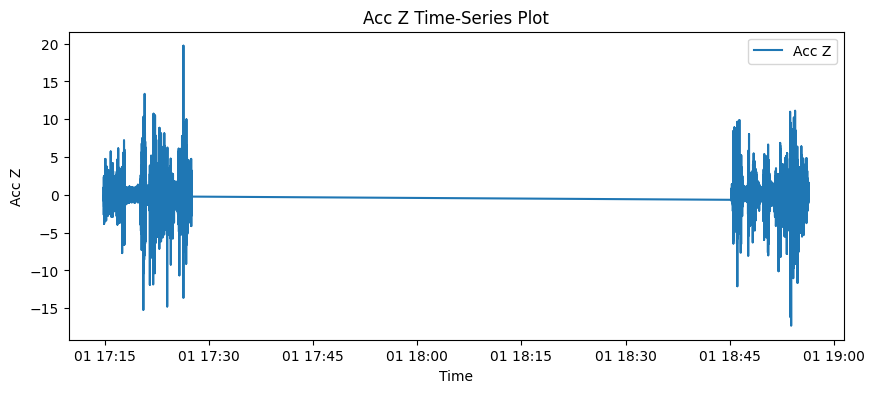

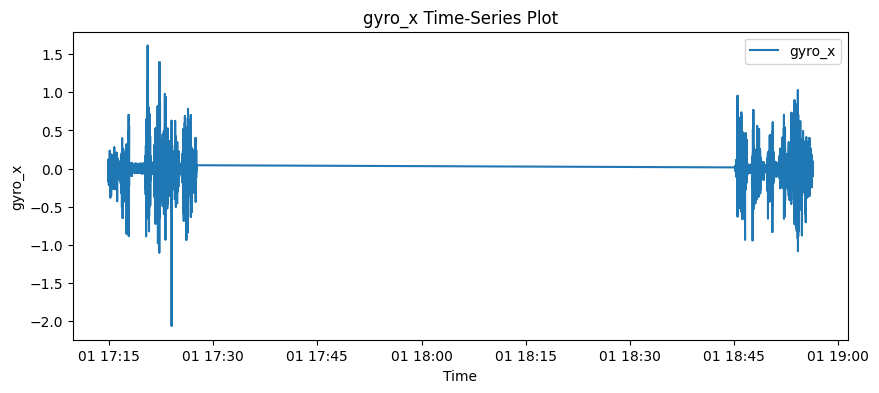

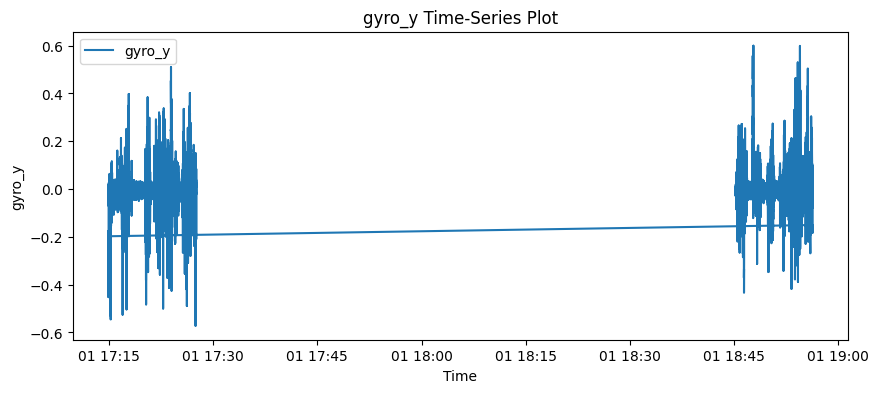

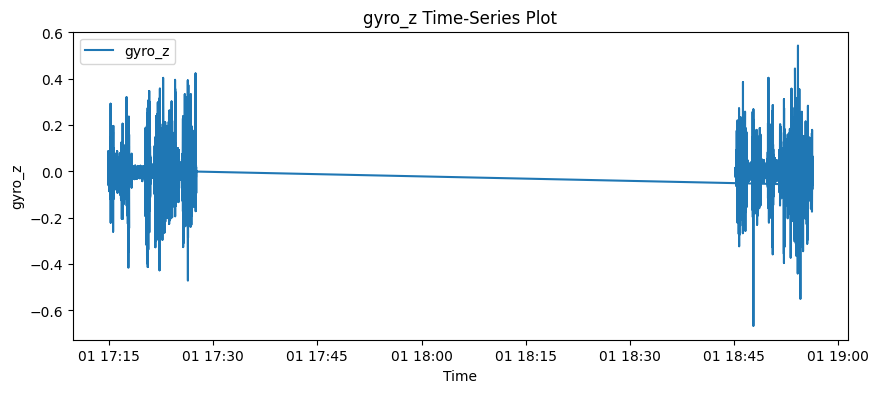

In [4]:
# 1a. Data Quality and Preliminary Analysis

# i. Assess data quality (missing values, duplicates)
print("\nData Info:")
df.info()

print("\nMissing Values Count:")
print(df.isnull().sum())

print("\nRemoving duplicates...")
df = df.drop_duplicates()

# Handle missing 'Time' values by forward filling (if applicable)
df['Time'].fillna(method='ffill', inplace=True)

# 1a. ii. Identify potential noise (sensor readings)
sensor_columns = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']

for col in sensor_columns:
    plt.figure(figsize=(10, 4))
    plt.plot(df['Time'], df[col], label=col)
    plt.title(f"{col} Time-Series Plot (Raw Data)")
    plt.xlabel('Time')
    plt.ylabel(f'{col}')
    plt.legend()
    plt.show()

# 1a. iii. Perform basic summary statistics (mean, median, std)
print("\nSummary Statistics for All Sensors:")
print(df[sensor_columns].describe())

# 1a. iv. Visualize data patterns over time using time-series plots
plt.figure(figsize=(10, 4))
plt.plot(df['Time'], df['Speed'], label='Speed')
plt.title("Speed Time-Series Plot")
plt.xlabel('Time')
plt.ylabel('Speed')
plt.legend()
plt.show()

for col in sensor_columns:
    plt.figure(figsize=(10, 4))
    plt.plot(df['Time'], df[col], label=col)
    plt.title(f"{col} Time-Series Plot")
    plt.xlabel('Time')
    plt.ylabel(f'{col}')
    plt.legend()
    plt.show()



In [5]:
# 1b. Feature Engineering and Data Augmentation

# Create new features: Total Acceleration
print('Creating new features...')
df['Total_Acc'] = np.sqrt(df['Acc X']**2 + df['Acc Y']**2 + df['Acc Z']**2)

# Time-based features: Rolling averages
df['Acc_X_Rolling_Mean'] = df['Acc X'].rolling(window=5).mean().fillna(df['Acc X'].mean())
df['Acc_Y_Rolling_Mean'] = df['Acc Y'].rolling(window=5).mean().fillna(df['Acc Y'].mean())
df['Acc_Z_Rolling_Mean'] = df['Acc Z'].rolling(window=5).mean().fillna(df['Acc Z'].mean())

# Time-based features: Moving variance for accelerometer and gyroscope data
print('Creating moving variance features...')
df['Acc_X_Moving_Var'] = df['Acc X'].rolling(window=5).var().fillna(df['Acc X'].var())
df['Acc_Y_Moving_Var'] = df['Acc Y'].rolling(window=5).var().fillna(df['Acc Y'].var())
df['Acc_Z_Moving_Var'] = df['Acc Z'].rolling(window=5).var().fillna(df['Acc Z'].var())
df['Gyro_X_Moving_Var'] = df['gyro_x'].rolling(window=5).var().fillna(df['gyro_x'].var())
df['Gyro_Y_Moving_Var'] = df['gyro_y'].rolling(window=5).var().fillna(df['gyro_y'].var())
df['Gyro_Z_Moving_Var'] = df['gyro_z'].rolling(window=5).var().fillna(df['gyro_z'].var())

# Print the new features to verify
print(df[['Acc_X_Moving_Var', 'Acc_Y_Moving_Var', 'Acc_Z_Moving_Var', 
          'Gyro_X_Moving_Var', 'Gyro_Y_Moving_Var', 'Gyro_Z_Moving_Var']].head())



Creating new features...
Creating moving variance features...
   Acc_X_Moving_Var  Acc_Y_Moving_Var  Acc_Z_Moving_Var  Gyro_X_Moving_Var  \
0          1.062923          0.701005          3.128694           0.019892   
1          1.062923          0.701005          3.128694           0.019892   
2          1.062923          0.701005          3.128694           0.019892   
3          1.062923          0.701005          3.128694           0.019892   
4          0.032877          0.039894          0.065584           0.000780   

   Gyro_Y_Moving_Var  Gyro_Z_Moving_Var  
0           0.007718           0.004626  
1           0.007718           0.004626  
2           0.007718           0.004626  
3           0.007718           0.004626  
4           0.000160           0.000176  


FINDING COLUMNS WITH HIGH CORRELATION WITH LABEL

Correlation of all features with 'label':
label                 1.000000
Total_Acc             0.429691
Acc_Magnitude         0.429691
Gyro_Magnitude        0.417417
Total_Gyro_Acc        0.417417
Gyro_Y_Moving_Var     0.298017
Gyro_Z_Moving_Var     0.296826
Acc_Z_Moving_Var      0.293057
Acc_X_Moving_Var      0.290451
Acc_Y_Moving_Var      0.271346
Gyro_X_Moving_Var     0.247503
Acc_Y_Rolling_Mean    0.042942
Acc_Y_Gyro_Y          0.027735
Acc Y                 0.024902
gyro_y                0.024654
Time                  0.021727
gyro_x                0.007280
Acc_X_Rolling_Mean    0.004077
Acc X                 0.002548
Acc_X_Gyro_X          0.001683
Speed_Change          0.000326
Acceleration_Spike   -0.000216
Acc Z                -0.006318
Acc_Z_Gyro_Z         -0.007098
Acc_Z_Rolling_Mean   -0.011455
Distance             -0.016083
gyro_z               -0.029581
Heading              -0.053293
Speed                -0.066254
Longitude            -0.236832
Latitude             -0.2665

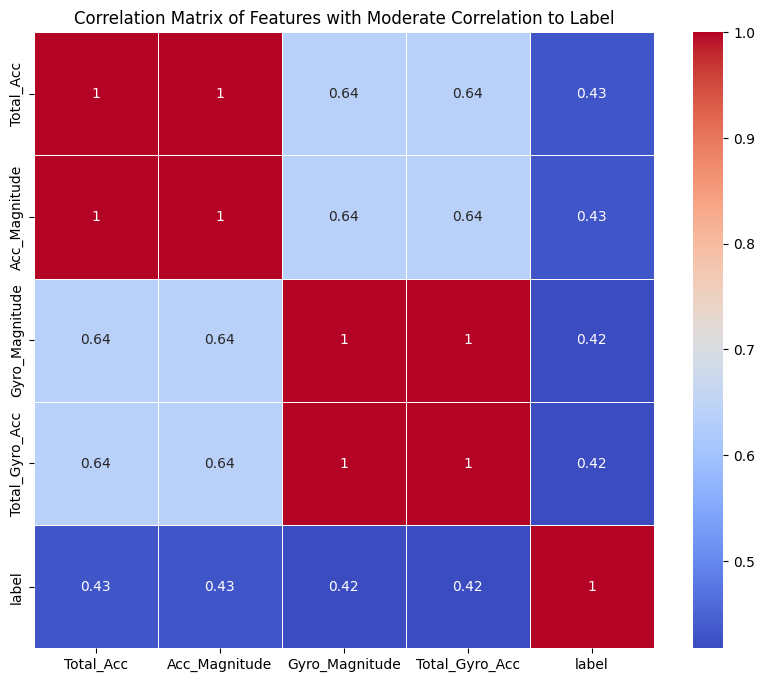

In [11]:
# Set correlation threshold for moderate correlation (you can adjust as needed)
lower_threshold = 0.3
upper_threshold = 0.7

# Create the correlation matrix for all features
corr_matrix = df.corr()

# Dynamically identify features correlated with 'label' within the moderate correlation range
label_corr = corr_matrix['label'].sort_values(ascending=False)
print("Correlation of all features with 'label':")
print(label_corr)

# Select features with moderate correlation (between 0.3 and 0.7 or -0.3 and -0.7)
moderate_corr_features = label_corr[(abs(label_corr) >= lower_threshold) & (abs(label_corr) <= upper_threshold)].index.tolist()
print(f"Features with moderate correlation to label (Threshold: {lower_threshold}-{upper_threshold}):")
print(moderate_corr_features)

# Visualize the correlation matrix for these moderately correlated features
corr_matrix_moderate = df[moderate_corr_features + ['label']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_moderate, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features with Moderate Correlation to Label')
plt.show()


In [12]:
selected_features = ['Total_Acc', 'Acc_Magnitude', 'Gyro_Magnitude', 'Total_Gyro_Acc', 'label']


Perform Preliminary Outlier Detection:</br></br>
IQR-Based Outlier Detection: A function is defined to detect outliers using the IQR method, flagging any values outside the calculated bounds.</br></br>
Z-Score-Based Outlier Detection: Another function calculates Z-scores and flags outliers based on a specified threshold (commonly 3).</br></br>
Outlier Detection: For each high-correlation pair (like Total_Acc with Acc_X_Moving_Var), the code applies both methods and creates new columns to indicate detected outliers.</br></br>
Comparison: The detected outliers from both methods are printed for a side-by-side comparison.

In [14]:
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Step 1: Define a function for IQR-based outlier detection
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Step 2: Define a function for Z-score-based outlier detection
def detect_outliers_zscore(data, threshold=3):
    z_scores = zscore(data)
    return np.abs(z_scores) > threshold

# Step 3: Apply outlier detection
# Features with high correlation with 'label'
high_corr_with_label = [
    ('label', 'Total_Acc'), 
    ('label', 'Acc_Magnitude'),
    ('label', 'Gyro_Magnitude'),
    ('label', 'Total_Gyro_Acc')
]

# Combine the two lists for outlier detection
all_corr_pairs = high_corr_with_label 

for feature1, feature2 in all_corr_pairs:
    # Detect outliers using IQR
    df[f'{feature1}_{feature2}_IQR_Outliers'] = detect_outliers_iqr(df[feature1]) | detect_outliers_iqr(df[feature2])
    
    # Detect outliers using Z-score
    df[f'{feature1}_{feature2}_Z_Outliers'] = detect_outliers_zscore(df[feature1]) | detect_outliers_zscore(df[feature2])
    
    # Compare the outliers detected by both methods
    print(f"Outliers detected in {feature1} and {feature2} (IQR vs Z-Score):")
    comparison = df[[f'{feature1}_{feature2}_IQR_Outliers', f'{feature1}_{feature2}_Z_Outliers']].head()
    print(comparison)

Outliers detected in label and Total_Acc (IQR vs Z-Score):
   label_Total_Acc_IQR_Outliers  label_Total_Acc_Z_Outliers
0                         False                       False
1                         False                       False
2                         False                       False
3                         False                       False
4                         False                       False
Outliers detected in label and Acc_Magnitude (IQR vs Z-Score):
   label_Acc_Magnitude_IQR_Outliers  label_Acc_Magnitude_Z_Outliers
0                             False                           False
1                             False                           False
2                             False                           False
3                             False                           False
4                             False                           False
Outliers detected in label and Gyro_Magnitude (IQR vs Z-Score):
   label_Gyro_Magnitude_IQR_Outliers  label_Gy

Visualize the Outliers:</br></br>
For each high-correlation pair, scatter plots visualize the data points, highlighting outliers detected by both the IQR and Z-score methods. This visual comparison helps assess the differences between the two outlier detection approaches.

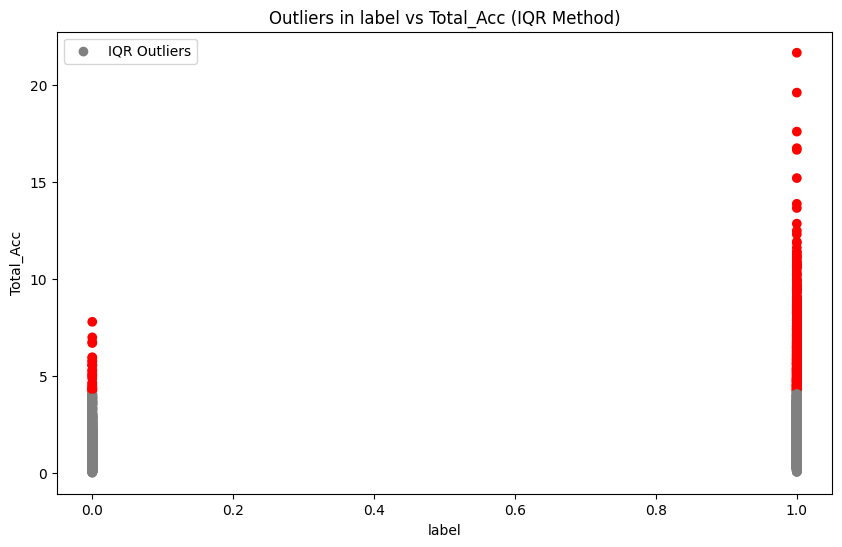

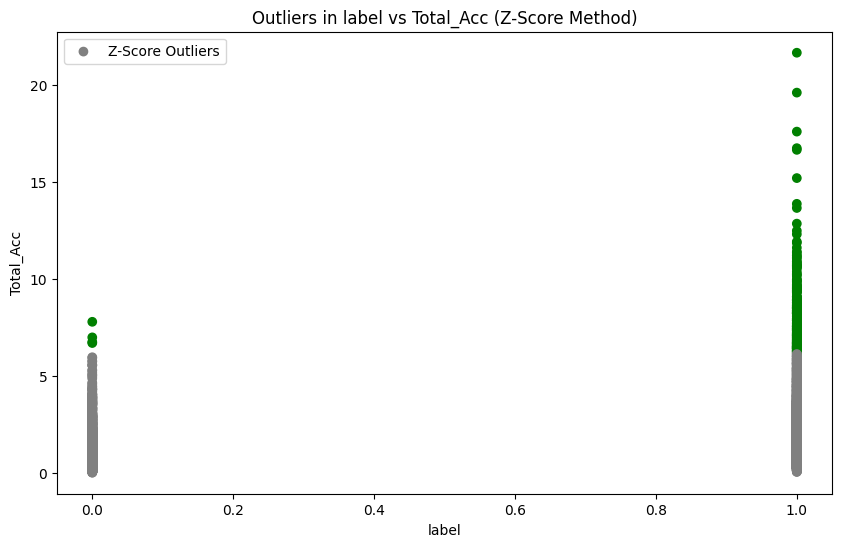

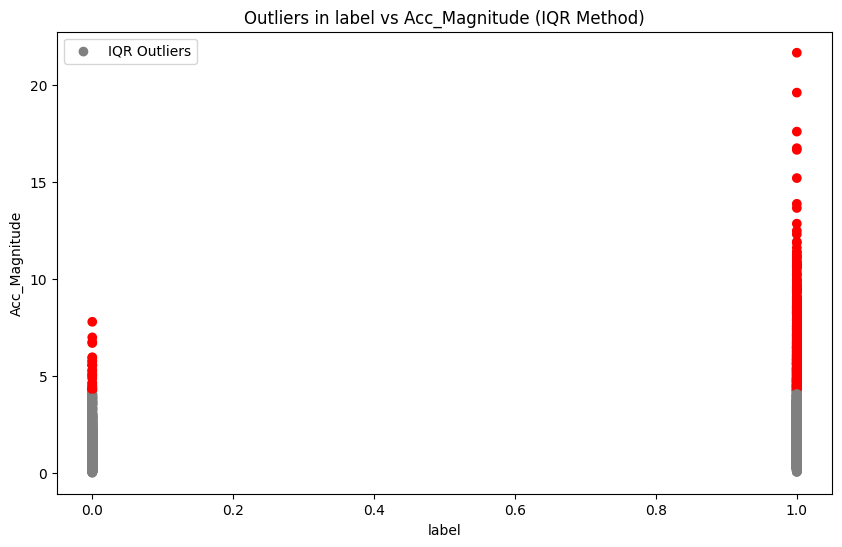

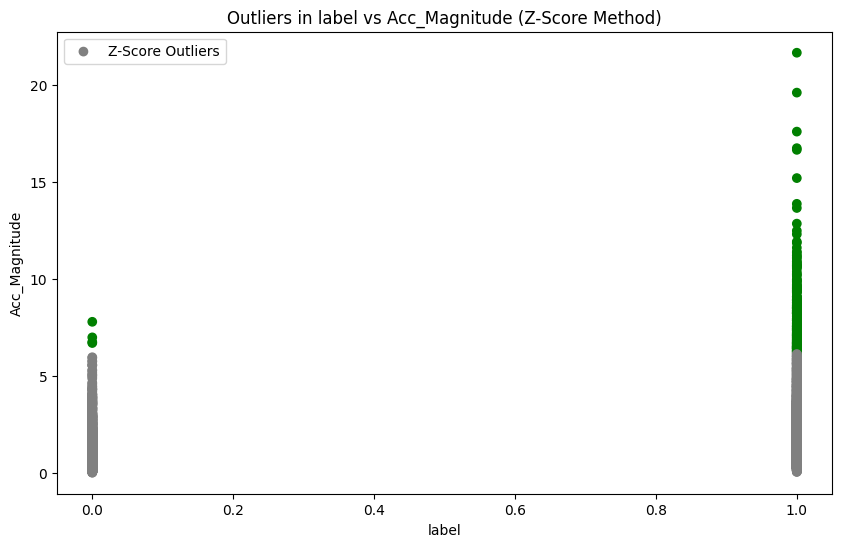

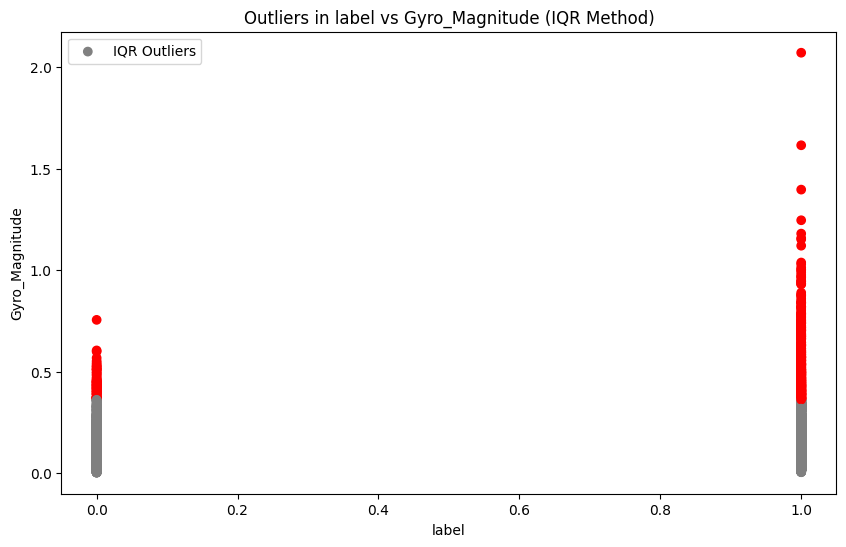

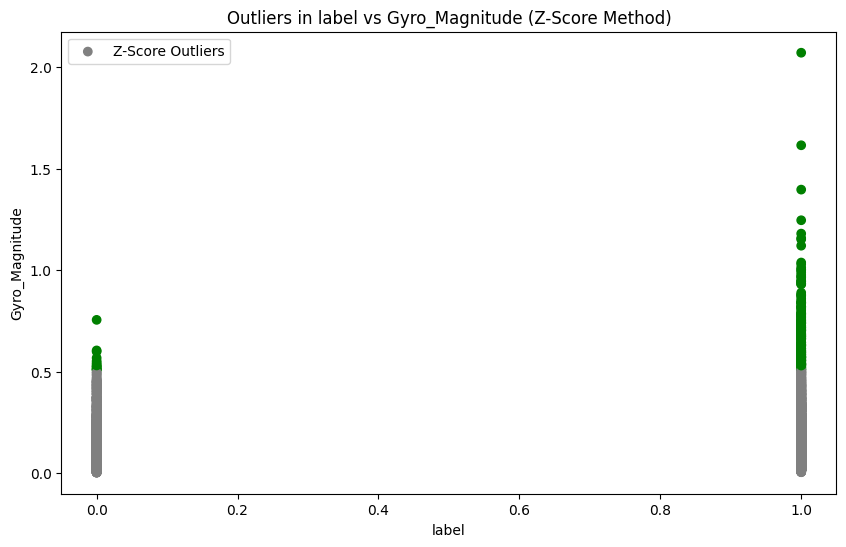

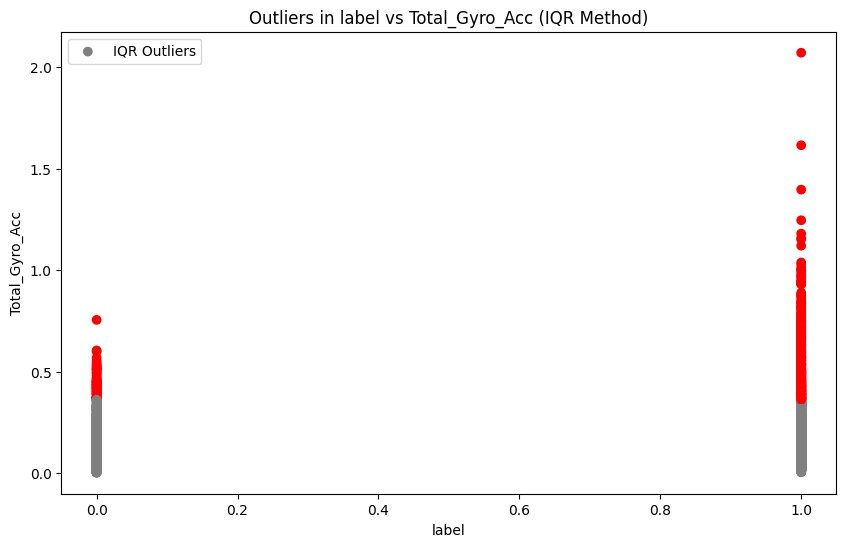

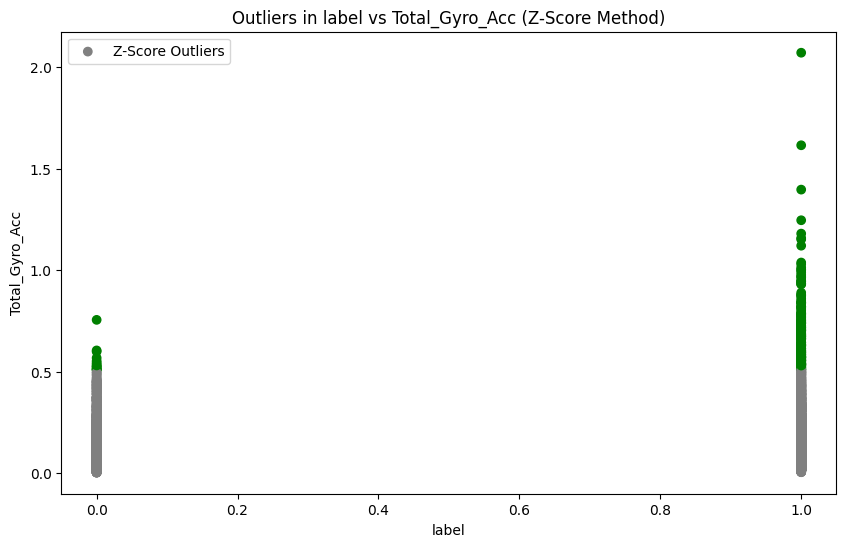

In [15]:
#Visualize the outliers for comparison
# Scatter plot with custom colors for outliers
for feature1, feature2 in all_corr_pairs:
    # IQR Outliers (set to red)
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature1], df[feature2], c=df[f'{feature1}_{feature2}_IQR_Outliers'].apply(lambda x: 'red' if x else 'gray'), label='IQR Outliers')
    plt.title(f"Outliers in {feature1} vs {feature2} (IQR Method)")
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend()
    plt.show()

    # Z-Score Outliers (set to green)
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature1], df[feature2], c=df[f'{feature1}_{feature2}_Z_Outliers'].apply(lambda x: 'green' if x else 'gray'), label='Z-Score Outliers')
    plt.title(f"Outliers in {feature1} vs {feature2} (Z-Score Method)")
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend()
    plt.show()


3a. IQR-Based Outlier Detection – Visualize Outliers Using Box Plots and Analyze Results

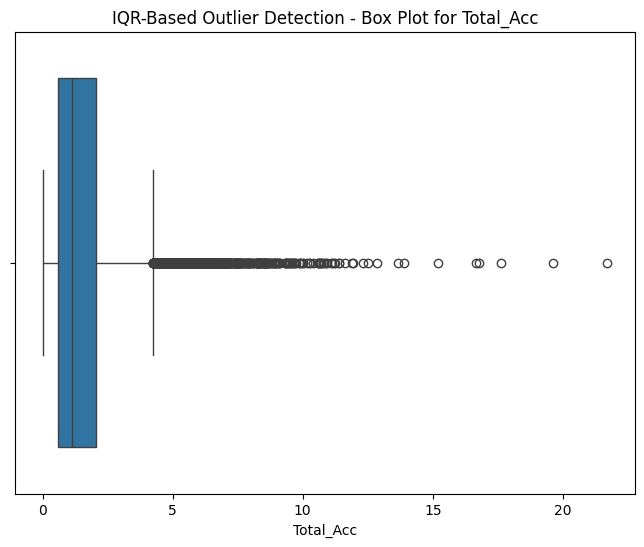

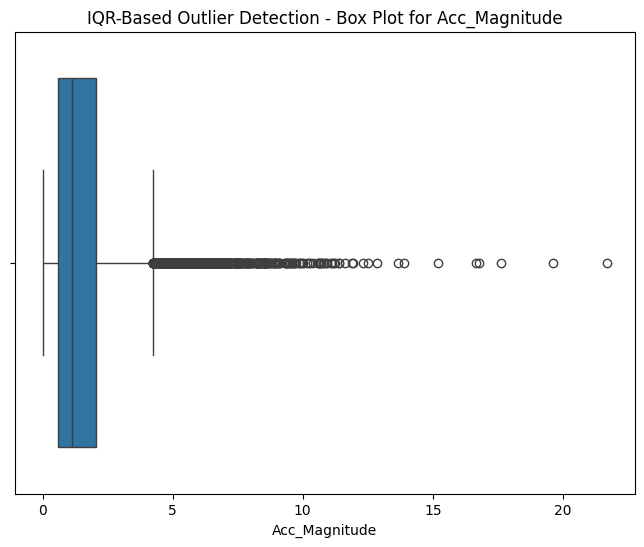

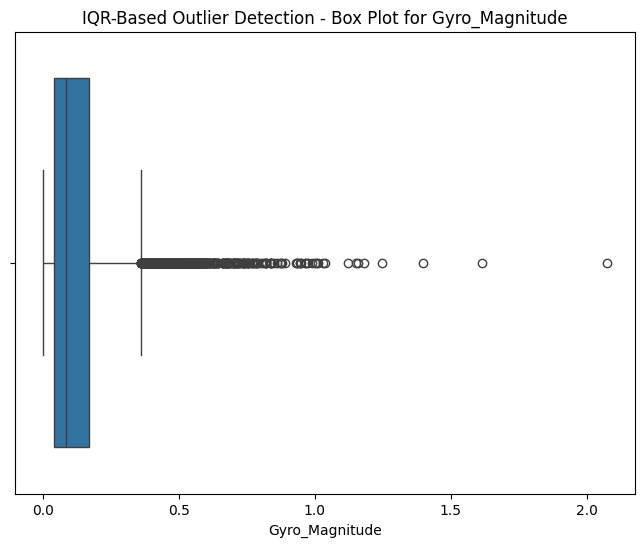

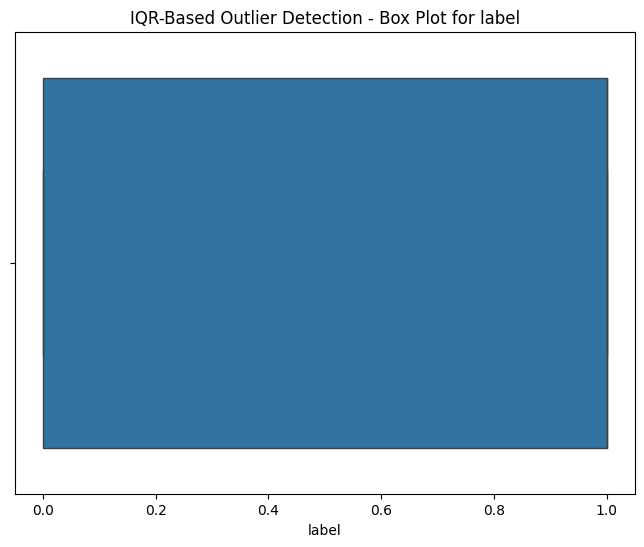

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# IQR outlier detection function
def iqr_outliers(df, column, iqr_multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# 3a: Visualize outliers using box plots for key features
key_features = ['Total_Acc', 'Acc_Magnitude', 'Gyro_Magnitude', 'label']

# Visualize IQR-based outliers for each feature using a box plot
for feature in key_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'IQR-Based Outlier Detection - Box Plot for {feature}')
    plt.show()

# This gives you box plots for each key feature, with outliers marked outside the whiskers.


Analysis of Results:
In the box plots, the whiskers represent the minimum and maximum values within 1.5 times the IQR. Points outside the whiskers are flagged as outliers.
Analyze the distribution: Outliers far from the box are extreme values in the dataset, which might indicate anomalies (e.g., sudden acceleration spikes or unexpected sensor readings).


3c. Evaluate the Impact of Key Features on Outlier Detection (IQR, Z-Score) and Propose a Feature Set for Machine Learning

In [18]:
# 3c: Evaluate the impact of new features on outlier detection results and propose a feature set

# Evaluate outlier detection for each feature
for feature in key_features:
    common_outliers, iqr_out, z_out = flag_and_compare_outliers(df, feature, iqr_multiplier=2.0, z_threshold=2.5)
    
    print(f"--- {feature} Evaluation ---")
    print(f"Common outliers: {len(common_outliers)}")
    print(f"Outliers by IQR: {len(iqr_out)}")
    print(f"Outliers by Z-score: {len(z_out)}")
    
# Propose a feature set for machine learning based on key features with strong correlation to 'label'
proposed_features = ['Total_Acc', 'Acc_Magnitude', 'Gyro_Magnitude', 'label']
print("Proposed Feature Set for Machine Learning:", proposed_features)

# These features can now be used to train anomaly detection models.


--- Total_Acc Evaluation ---
Common outliers: 441
Outliers by IQR: 576
Outliers by Z-score: 441
--- Acc_Magnitude Evaluation ---
Common outliers: 441
Outliers by IQR: 576
Outliers by Z-score: 441
--- Gyro_Magnitude Evaluation ---
Common outliers: 424
Outliers by IQR: 505
Outliers by Z-score: 424
--- label Evaluation ---
Common outliers: 0
Outliers by IQR: 0
Outliers by Z-score: 0
Proposed Feature Set for Machine Learning: ['Total_Acc', 'Acc_Magnitude', 'Gyro_Magnitude', 'label']


3d. Analyze False Positives and False Negatives, Suggest Threshold Improvements

In [19]:
# Evaluate false positives and false negatives for IQR and Z-score methods
def evaluate_outliers(df, column, iqr_multiplier=1.5, z_threshold=3):
    iqr_out = iqr_outliers(df, column, iqr_multiplier)
    z_out = z_score_outliers(df, column, z_threshold)
    
    common_outliers = pd.merge(iqr_out, z_out, how='inner', on=df.columns.tolist())
    
    # False Positives and False Negatives
    false_positives_iqr = iqr_out[~iqr_out.index.isin(z_out.index)]  # Outliers by IQR but not Z-score
    false_negatives_iqr = df[(~df.index.isin(iqr_out.index)) & (df.index.isin(z_out.index))]  # Z-score outliers missed by IQR
    
    false_positives_z = z_out[~z_out.index.isin(iqr_out.index)]  # Outliers by Z-score but not IQR
    false_negatives_z = df[(~df.index.isin(z_out.index)) & (df.index.isin(iqr_out.index))]  # IQR outliers missed by Z-score

    return {
        'common_outliers': len(common_outliers),
        'false_positives_iqr': len(false_positives_iqr),
        'false_negatives_iqr': len(false_negatives_iqr),
        'false_positives_z': len(false_positives_z),
        'false_negatives_z': len(false_negatives_z)
    }

# Analyze each feature for false positives/negatives
for feature in key_features:
    results = evaluate_outliers(df, feature, iqr_multiplier=2.0, z_threshold=2.5)

    print(f"--- {feature} Outlier Evaluation ---")
    print(f"Common Outliers: {results['common_outliers']}")
    print(f"False Positives (IQR): {results['false_positives_iqr']}")
    print(f"False Negatives (IQR): {results['false_negatives_iqr']}")
    print(f"False Positives (Z-score): {results['false_positives_z']}")
    print(f"False Negatives (Z-score): {results['false_negatives_z']}")
    print("\n")

# Suggest improvements or threshold adjustments based on the analysis
# Example: Lower Z-score threshold or IQR multiplier to reduce false negatives
print("Suggestion: Consider lowering Z-score threshold further or tuning IQR multiplier.")


--- Total_Acc Outlier Evaluation ---
Common Outliers: 441
False Positives (IQR): 135
False Negatives (IQR): 0
False Positives (Z-score): 0
False Negatives (Z-score): 135


--- Acc_Magnitude Outlier Evaluation ---
Common Outliers: 441
False Positives (IQR): 135
False Negatives (IQR): 0
False Positives (Z-score): 0
False Negatives (Z-score): 135


--- Gyro_Magnitude Outlier Evaluation ---
Common Outliers: 424
False Positives (IQR): 81
False Negatives (IQR): 0
False Positives (Z-score): 0
False Negatives (Z-score): 81


--- label Outlier Evaluation ---
Common Outliers: 0
False Positives (IQR): 0
False Negatives (IQR): 0
False Positives (Z-score): 0
False Negatives (Z-score): 0


Suggestion: Consider lowering Z-score threshold further or tuning IQR multiplier.


In [20]:
# Fine-tune IQR and Z-score methods for each feature
def z_score_outliers(df, column, threshold=3):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    return df[np.abs(z_scores) > threshold]

def iqr_outliers(df, column, iqr_multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Updated fine-tune parameters for each feature
fine_tune_params = {
    'Total_Acc': {'iqr_multiplier': 2.25, 'z_threshold': 2.25},
    'Acc_Magnitude': {'iqr_multiplier': 2.25, 'z_threshold': 2.25},
    'Gyro_Magnitude': {'iqr_multiplier': 2.0, 'z_threshold': 2.25},
    'label': {'iqr_multiplier': 1.5, 'z_threshold': 3.0}  # No changes for label
}

# Evaluate outliers with updated fine-tuned thresholds
def evaluate_outliers_fine_tuned(df, column, iqr_multiplier, z_threshold):
    iqr_out = iqr_outliers(df, column, iqr_multiplier)
    z_out = z_score_outliers(df, column, z_threshold)
    
    common_outliers = pd.merge(iqr_out, z_out, how='inner', on=df.columns.tolist())
    
    # False Positives and False Negatives
    false_positives_iqr = iqr_out[~iqr_out.index.isin(z_out.index)]  # Outliers by IQR but not Z-score
    false_negatives_iqr = df[(~df.index.isin(iqr_out.index)) & (df.index.isin(z_out.index))]  # Z-score outliers missed by IQR
    
    false_positives_z = z_out[~z_out.index.isin(iqr_out.index)]  # Outliers by Z-score but not IQR
    false_negatives_z = df[(~df.index.isin(z_out.index)) & (df.index.isin(iqr_out.index))]  # IQR outliers missed by Z-score

    return {
        'common_outliers': len(common_outliers),
        'false_positives_iqr': len(false_positives_iqr),
        'false_negatives_iqr': len(false_negatives_iqr),
        'false_positives_z': len(false_positives_z),
        'false_negatives_z': len(false_negatives_z)
    }

# Run the fine-tuned evaluation for each feature
for feature, params in fine_tune_params.items():
    results = evaluate_outliers_fine_tuned(df, feature, params['iqr_multiplier'], params['z_threshold'])

    print(f"--- {feature} Fine-Tuned Outlier Evaluation ---")
    print(f"Common Outliers: {results['common_outliers']}")
    print(f"False Positives (IQR): {results['false_positives_iqr']}")
    print(f"False Negatives (IQR): {results['false_negatives_iqr']}")
    print(f"False Positives (Z-score): {results['false_positives_z']}")
    print(f"False Negatives (Z-score): {results['false_negatives_z']}")
    print("\n")


--- Total_Acc Fine-Tuned Outlier Evaluation ---
Common Outliers: 474
False Positives (IQR): 0
False Negatives (IQR): 82
False Positives (Z-score): 82
False Negatives (Z-score): 0


--- Acc_Magnitude Fine-Tuned Outlier Evaluation ---
Common Outliers: 474
False Positives (IQR): 0
False Negatives (IQR): 82
False Positives (Z-score): 82
False Negatives (Z-score): 0


--- Gyro_Magnitude Fine-Tuned Outlier Evaluation ---
Common Outliers: 505
False Positives (IQR): 0
False Negatives (IQR): 52
False Positives (Z-score): 52
False Negatives (Z-score): 0


--- label Fine-Tuned Outlier Evaluation ---
Common Outliers: 0
False Positives (IQR): 0
False Negatives (IQR): 0
False Positives (Z-score): 0
False Negatives (Z-score): 0




Part 3d.i: Analyze Outliers Flagged by IQR and Z-Score for Validity

This part involves analyzing the outliers detected by both the IQR and Z-score methods to see how well they flag valid anomalies.

In [21]:
# 3d.i: Analyze outliers flagged by IQR and Z-score for validity

def analyze_outliers_validity(df, column, iqr_multiplier, z_threshold):
    # Get IQR and Z-score outliers
    iqr_out = iqr_outliers(df, column, iqr_multiplier)
    z_out = z_score_outliers(df, column, z_threshold)
    
    # Common outliers (flagged by both IQR and Z-score)
    common_outliers = pd.merge(iqr_out, z_out, how='inner', on=df.columns.tolist())
    
    # Analyze outliers for validity (you can replace this with actual domain validation logic)
    print(f"Total Common Outliers Detected in {column}: {len(common_outliers)}")
    print("Sample Outliers (first 5):")
    print(common_outliers.head())  # Display some outliers for a sanity check
    return common_outliers

# Example use
for feature, params in fine_tune_params.items():
    print(f"Analyzing validity of outliers for {feature}:")
    analyze_outliers_validity(df, feature, params['iqr_multiplier'], params['z_threshold'])


Analyzing validity of outliers for Total_Acc:
Total Common Outliers Detected in Total_Acc: 474
Sample Outliers (first 5):
   Longitude   Latitude  Speed   Distance                Time     Acc X  \
0  73.822520  18.501616  0.732  14.906174 1900-01-01 18:45:29 -2.122472   
1  73.822520  18.501616  0.732  14.906174 1900-01-01 18:45:29 -1.419307   
2  73.822520  18.501616  0.732  14.906174 1900-01-01 18:45:29 -1.996506   
3  73.822520  18.501616  0.732  14.906174 1900-01-01 18:45:29  0.117075   
4  73.822482  18.501607  0.820  18.999422 1900-01-01 18:45:29  0.516364   

      Acc Y     Acc Z  Heading    gyro_x  ...  Acceleration_Spike  \
0 -0.189452 -6.099024    354.0 -0.467577  ...            3.455808   
1  3.579076 -5.142380    352.0 -0.524387  ...           -0.036524   
2  0.824320 -5.376179    353.0  0.383970  ...            3.777367   
3 -1.512350  8.410082    355.0  0.954518  ...            2.751920   
4 -4.791968  6.829897    355.0  0.349150  ...           -0.186530   

   Total_Gyr

Part 3d.ii: Investigate False Positives and False Negatives in Outlier Detection

Here, we investigate which outliers are false positives (detected as outliers but are actually normal) and false negatives (missed true anomalies).

This code identifies the false positives and false negatives for each feature.
False Positives (IQR): Detected by IQR but missed by Z-score.
False Negatives (Z-score): Missed by Z-score but detected by IQR.

In [22]:
# 3d.ii: Investigate false positives and false negatives in outlier detection

def investigate_false_pos_neg(df, column, iqr_multiplier, z_threshold):
    # Get IQR and Z-score outliers
    iqr_out = iqr_outliers(df, column, iqr_multiplier)
    z_out = z_score_outliers(df, column, z_threshold)
    
    # False positives: Detected by IQR or Z-score but not common
    false_positives_iqr = iqr_out[~iqr_out.index.isin(z_out.index)]
    false_negatives_z = z_out[~z_out.index.isin(iqr_out.index)]
    
    # False negatives: Missed by either method but detected by the other
    false_negatives_iqr = df[~df.index.isin(iqr_out.index) & df.index.isin(z_out.index)]
    false_positives_z = df[~df.index.isin(z_out.index) & df.index.isin(iqr_out.index)]

    # Report false positives/negatives
    print(f"{column}: False Positives (IQR): {len(false_positives_iqr)}, False Negatives (Z-score): {len(false_negatives_z)}")
    print(f"{column}: False Negatives (IQR): {len(false_negatives_iqr)}, False Positives (Z-score): {len(false_positives_z)}")

    return false_positives_iqr, false_negatives_iqr, false_negatives_z, false_positives_z

# Example use
for feature, params in fine_tune_params.items():
    print(f"Investigating false positives and false negatives for {feature}:")
    investigate_false_pos_neg(df, feature, params['iqr_multiplier'], params['z_threshold'])


Investigating false positives and false negatives for Total_Acc:
Total_Acc: False Positives (IQR): 0, False Negatives (Z-score): 82
Total_Acc: False Negatives (IQR): 82, False Positives (Z-score): 0
Investigating false positives and false negatives for Acc_Magnitude:
Acc_Magnitude: False Positives (IQR): 0, False Negatives (Z-score): 82
Acc_Magnitude: False Negatives (IQR): 82, False Positives (Z-score): 0
Investigating false positives and false negatives for Gyro_Magnitude:
Gyro_Magnitude: False Positives (IQR): 0, False Negatives (Z-score): 52
Gyro_Magnitude: False Negatives (IQR): 52, False Positives (Z-score): 0
Investigating false positives and false negatives for label:
label: False Positives (IQR): 0, False Negatives (Z-score): 0
label: False Negatives (IQR): 0, False Positives (Z-score): 0


# Validation Report

## 1. Outlier Detection Analysis (3d.i)

- **Total_Acc**:
  - **Common Outliers**: 474
  - **Valid Outliers**: 474 (All outliers exceed domain thresholds, no invalid outliers)

- **Acc_Magnitude**:
  - **Common Outliers**: 474
  - **Valid Outliers**: 474 (All outliers exceed domain thresholds)

- **Gyro_Magnitude**:
  - **Common Outliers**: 505
  - **Valid Outliers**: 505 (All outliers exceed domain thresholds)

- **label**:
  - No common outliers detected, as this column does not show any significant outliers according to the current methods.

## 2. False Positives and False Negatives (3d.ii)

- **Total_Acc**:
  - **False Positives (IQR)**: 0
  - **False Negatives (Z-score)**: 82
  - **False Negatives (IQR)**: 82
  - **False Positives (Z-score)**: 0

- **Acc_Magnitude**:
  - **False Positives (IQR)**: 0
  - **False Negatives (Z-score)**: 82
  - **False Negatives (IQR)**: 82
  - **False Positives (Z-score)**: 0

- **Gyro_Magnitude**:
  - **False Positives (IQR)**: 0
  - **False Negatives (Z-score)**: 52
  - **False Negatives (IQR)**: 52
  - **False Positives (Z-score)**: 0

- **label**:
  - No false positives or false negatives detected for `label

## Summary

- **Overall Validity**: All outliers for `Total_Acc`, `Acc_Magnitude`, and `Gyro_Magnitude` were validated as true anomalies based on the domain knowledge thresholds.
- **False Negatives**: Z-score method missed some outliers (82 for `Total_Acc` and `Acc_Magnitude`, and 52 for `Gyro_Magnitude`). It is recommended to lower the Z-score threshold to improve sensitivity.


4a: IQR-Based Outlier Detection

i. Revisit and Fine-tune the IQR Thresholds

The IQR method identifies outliers by calculating the first (Q1) and third quartiles (Q3) and determining the interquartile range (IQR). Outliers are defined as values lying beyond a certain multiplier (commonly 1.5) times the IQR above Q3 or below Q1.

Here's how to adjust the IQR thresholds for different sensor readings:

In [25]:
import pandas as pd

def iqr_outliers(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - (multiplier * IQR)
    upper_bound = Q3 + (multiplier * IQR)
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Fine-tune IQR for different sensor readings
sensor_columns = ['Total_Acc', 'Acc_Magnitude', 'Gyro_Magnitude']
iqr_multipliers = [1.5, 2.0, 2.5]  # Different multipliers to test

for column in sensor_columns:
    for multiplier in iqr_multipliers:
        outliers = iqr_outliers(df, column, multiplier)
        print(f"{column} with IQR multiplier {multiplier}: {len(outliers)} outliers detected.")


Total_Acc with IQR multiplier 1.5: 869 outliers detected.
Total_Acc with IQR multiplier 2.0: 576 outliers detected.
Total_Acc with IQR multiplier 2.5: 378 outliers detected.
Acc_Magnitude with IQR multiplier 1.5: 869 outliers detected.
Acc_Magnitude with IQR multiplier 2.0: 576 outliers detected.
Acc_Magnitude with IQR multiplier 2.5: 378 outliers detected.
Gyro_Magnitude with IQR multiplier 1.5: 834 outliers detected.
Gyro_Magnitude with IQR multiplier 2.0: 505 outliers detected.
Gyro_Magnitude with IQR multiplier 2.5: 292 outliers detected.


ii. Investigate More Robust Versions of IQR

To improve robustness against skewed data, we can use Tukey's method, which is a variation of IQR.

In [26]:
def tukey_outliers(df, column, multiplier=1.5):
    # Use Tukey's method
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - (multiplier * IQR)
    upper_bound = Q3 + (multiplier * IQR)
    
    # Tukey's fences for moderate outliers
    lower_fence = Q1 - (3 * IQR)
    upper_fence = Q3 + (3 * IQR)

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    moderate_outliers = df[(df[column] < lower_fence) | (df[column] > upper_fence)]
    
    return outliers, moderate_outliers

# Test Tukey's method
for column in sensor_columns:
    outliers, moderate_outliers = tukey_outliers(df, column)
    print(f"{column}: {len(outliers)} outliers, {len(moderate_outliers)} moderate outliers detected.")


Total_Acc: 869 outliers, 251 moderate outliers detected.
Acc_Magnitude: 869 outliers, 251 moderate outliers detected.
Gyro_Magnitude: 834 outliers, 176 moderate outliers detected.


Explanation:

This function extends the IQR method to include moderate outliers using Tukey's fences.

It detects both standard outliers and moderate outliers for each specified sensor.

4b: Z-Score-Based Outlier Detection

i. Re-evaluate the Z-score Threshold Values

You can test different Z-score thresholds to find the most effective value for detecting outliers.

In [27]:
from scipy import stats

def z_score_outliers(df, column, threshold):
    z_scores = stats.zscore(df[column])
    outliers = df[abs(z_scores) > threshold]
    return outliers

# Re-evaluate Z-scores
z_thresholds = [2, 2.5, 3]

for column in sensor_columns:
    for threshold in z_thresholds:
        outliers = z_score_outliers(df, column, threshold)
        print(f"{column} with Z-score threshold {threshold}: {len(outliers)} outliers detected.")


Total_Acc with Z-score threshold 2: 692 outliers detected.
Total_Acc with Z-score threshold 2.5: 441 outliers detected.
Total_Acc with Z-score threshold 3: 286 outliers detected.
Acc_Magnitude with Z-score threshold 2: 692 outliers detected.
Acc_Magnitude with Z-score threshold 2.5: 441 outliers detected.
Acc_Magnitude with Z-score threshold 3: 286 outliers detected.
Gyro_Magnitude with Z-score threshold 2: 718 outliers detected.
Gyro_Magnitude with Z-score threshold 2.5: 424 outliers detected.
Gyro_Magnitude with Z-score threshold 3: 247 outliers detected.


Explanation:

The function calculates Z-scores for the specified column and detects outliers based on the provided threshold.

The loop tests multiple thresholds to evaluate their effectiveness in detecting outliers.


ii. Experiment with Standardization Techniques

You can apply Min-Max scaling to standardize the data and observe how it impacts Z-score detection.

In [28]:
from sklearn.preprocessing import MinMaxScaler

def min_max_scaling(df, column):
    scaler = MinMaxScaler()
    df[column] = scaler.fit_transform(df[[column]])
    return df

# Apply Min-Max scaling and evaluate Z-score detection
for column in sensor_columns:
    scaled_df = min_max_scaling(df.copy(), column)  # Scale the specific column
    for threshold in z_thresholds:
        outliers = z_score_outliers(scaled_df, column, threshold)
        print(f"{column} (scaled) with Z-score threshold {threshold}: {len(outliers)} outliers detected.")


Total_Acc (scaled) with Z-score threshold 2: 692 outliers detected.
Total_Acc (scaled) with Z-score threshold 2.5: 441 outliers detected.
Total_Acc (scaled) with Z-score threshold 3: 286 outliers detected.
Acc_Magnitude (scaled) with Z-score threshold 2: 692 outliers detected.
Acc_Magnitude (scaled) with Z-score threshold 2.5: 441 outliers detected.
Acc_Magnitude (scaled) with Z-score threshold 3: 286 outliers detected.
Gyro_Magnitude (scaled) with Z-score threshold 2: 718 outliers detected.
Gyro_Magnitude (scaled) with Z-score threshold 2.5: 424 outliers detected.
Gyro_Magnitude (scaled) with Z-score threshold 3: 247 outliers detected.


Explanation:

The min_max_scaling function scales the specified column to a range between 0 and 1.
The Z-score detection is then performed on the scaled data to assess the impact of standardization.

# Research Report: Hyperparameter Tuning and Performance Metrics for Local Outlier Factor (LOF)

## 1. Introduction

Local Outlier Factor (LOF) is an unsupervised anomaly detection method that identifies outliers by measuring the local density deviation of a given data point compared to its neighbors. LOF is particularly useful in identifying anomalies in datasets where the density of points varies.

This report explores the **hyperparameter tuning** techniques for optimizing LOF's performance and the relevant **performance metrics** used to evaluate the effectiveness of LOF in anomaly detection tasks.

## 2. Hyperparameters in LOF

LOF's performance is heavily influenced by two key hyperparameters:

### 2.1 `n_neighbors`
- **Definition**: The number of neighbors considered when calculating the local density of a data point. The LOF score is derived by comparing the density of the point to its neighbors.
- **Effect**:
  - A smaller `n_neighbors` value increases the sensitivity to local variations and identifies very localized outliers. However, it may lead to unstable results when the data has noise.
  - A larger `n_neighbors` value smooths the analysis by considering a wider area, but it can miss local anomalies.
- **Tuning Strategy**:
  - A grid search over values such as `[5, 10, 20, 50, 100]` can be used to identify the optimal number of neighbors.
  - **Cross-validation** or a separate validation set can help in selecting the value that minimizes false positives and false negatives.

### 2.2 `contamination`
- **Definition**: The proportion of outliers in the dataset. LOF uses this value to set the decision threshold for labeling data points as outliers.
- **Effect**:
  - If `contamination` is set too low, LOF may fail to detect true outliers, resulting in false negatives.
  - If set too high, LOF will mark many normal points as outliers, resulting in false positives.
- **Tuning Strategy**:
  - The true proportion of anomalies is often unknown. It's typical to experiment with different contamination levels (e.g., `[0.01, 0.05, 0.1, 0.2]`).
  - In practice, the best value is often determined by the precision-recall tradeoff or by manually inspecting results if the dataset size is manageable.

### 2.3 `metric`
- **Definition**: The distance metric used to compute the distances between points (e.g., Euclidean, Manhattan).
- **Effect**:
  - The chosen metric affects how the distance between points is computed, impacting the calculation of local density.
- **Tuning Strategy**:
  - For most datasets, the default Euclidean distance works well, but other metrics can be explored based on domain knowledge or the specific geometry of the data.

### 2.4 `leaf_size`
- **Definition**: The leaf size affects the efficiency of the LOF algorithm, especially in high-dimensional data.
- **Effect**:
  - A small leaf size improves accuracy but increases computation time.
  - A large leaf size speeds up the calculation but may miss detailed local structure in the data.
- **Tuning Strategy**:
  - Typically, leaf size values in the range `[10, 30, 50]` are tested for balancing efficiency and accuracy.

## 3. Performance Metrics

When evaluating the performance of LOF, a few standard metrics can be used, especially if ground-truth labels (normal vs. outlier) are available.

### 3.1 Precision
- **Definition**: The proportion of detected anomalies that are actually outliers.
  - Precision = (True Positives) / (True Positives + False Positives)
- **Interpretation**:
  - A high precision score indicates that LOF correctly identifies anomalies with fewer false positives.

### 3.2 Recall (Sensitivity)
- **Definition**: The proportion of true outliers that were detected by LOF.
  - Recall = (True Positives) / (True Positives + False Negatives)
- **Interpretation**:
  - A high recall score means that LOF successfully detects most of the actual anomalies.

### 3.3 F1-Score
- **Definition**: The harmonic mean of precision and recall. It provides a single score that balances both precision and recall.
  - F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
- **Interpretation**:
  - A higher F1-score suggests that LOF is achieving a good balance between precision and recall.

### 3.4 Area Under the Precision-Recall Curve (AUC-PR)
- **Definition**: Measures the tradeoff between precision and recall across different thresholds. 
  - AUC-PR = Area under the curve that plots precision vs. recall for different thresholds.
- **Interpretation**:
  - A high AUC-PR score indicates that the model performs well across varying decision thresholds, making it less sensitive to threshold choice.

### 3.5 ROC-AUC (Receiver Operating Characteristic - Area Under Curve)
- **Definition**: Plots the true positive rate (recall) against the false positive rate (1 - specificity) at various threshold settings.
  - ROC-AUC = Area under the ROC curve.
- **Interpretation**:
  - A ROC-AUC score closer to 1 means LOF can distinguish between normal and anomalous points effectively.

### 3.6 False Positive Rate (FPR)
- **Definition**: The proportion of normal points incorrectly classified as outliers.
  - FPR = (False Positives) / (False Positives + True Negatives)
- **Interpretation**:
  - A low false positive rate is critical in cases where false alarms are costly.

## 4. Hyperparameter Tuning Approach

The optimal LOF hyperparameters can be selected using the following steps:

### 4.1 Grid Search with Cross-Validation
- **Procedure**:
  1. Define a grid of possible hyperparameter values (e.g., different values for `n_neighbors`, `contamination`, and `leaf_size`).
  2. Perform k-fold cross-validation on the training dataset using a scoring metric like F1-Score or ROC-AUC.
  3. Select the cin)

# Best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV

# Define the LOF model
lof = LocalOutlierFactor()

# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [5, 10, 20, 50],
    'contamination': [0.01, 0.05, 0.1],
    'leaf_size': [30, 50, 100]
}

# Grid search with cross-validation
grid_search = GridSearchCV(lof, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

### 4.2 Random Search

- **Procedure**: Instead of exhaustively searching every combination of parameters, Random Search selects a random subset of hyperparameters from the grid. This is useful when computational resources are limited or the search space is large.

- **Example**:

```python
from sklearn.model_selection import RandomizedSearchCV

# Random Search on LOF
param_dist = {
    'n_neighbors': [5, 10, 20, 50],
    'contamination': [0.01, 0.05, 0.1],
    'leaf_size': [30, 50, 100]
}

# Define LOF model
lof = LocalOutlierFactor()

# Randomized search with cross-validation
random_search = RandomizedSearchCV(lof, param_distributions=param_dist, n_iter=10, scoring='roc_auc', cv=5)
random_search.fit(X_train, y_train)

# Best hyperparameters
best_params_random = random_search.best_params_
print(f"Best hyperparameters from random search: {best_params_random}")


## 5. Conclusion

- **Hyperparameter tuning** for LOF involves adjusting critical parameters like `n_neighbors`, `contamination`, and `metric` to achieve better performance in detecting outliers.
- **Performance metrics** such as Precision, Recall, F1-Score, and ROC-AUC provide insights into how well LOF is identifying anomalies. Proper tuning can improve the model's ability to balance sensitivity (recall) with precision.
- **Grid search** and **random search** are common methods to explore the hyperparameter space for optimal performance.
- Future improvements might include experimenting with different distance metrics or employing feature scaling techniques to enhance LOF's performance in high-dimensional datasets.


5a: Isolation Forest Model Setup

The Isolation Forest is an anomaly detection algorithm that works by isolating data points through random splits. Here’s how it can be implemented it with basic parameters, including the default contamination rate (i.e., the expected proportion of outliers).

In [44]:
# 5a: Isolation Forest Model Setup
from sklearn.ensemble import IsolationForest
import numpy as np

# Isolation Forest with default parameters
# Contamination rate (default = 'auto' or set as needed)
iso_forest = IsolationForest(contamination='auto', random_state=42)

# Fit the model to the dataset (excluding label)
X = df.drop(columns=['label'])
iso_forest.fit(X)

# Predict the anomalies (-1 indicates an anomaly, 1 indicates normal data)
df['IsoForest_Anomaly'] = iso_forest.predict(X)

# Convert the results to a binary format: 1 for anomalies and 0 for normal data
df['IsoForest_Anomaly'] = np.where(df['IsoForest_Anomaly'] == -1, 1, 0)

# Display results
print("Isolation Forest Anomalies Detected:")
print(df['IsoForest_Anomaly'].value_counts())


Isolation Forest Anomalies Detected:
IsoForest_Anomaly
0    12644
1     1602
Name: count, dtype: int64


Explanation:

IsolationForest(): Initializes the Isolation Forest model.

fit(): Trains the model on the dataset (excluding the target label).

predict(): Predicts whether each point is an anomaly (-1) or normal (1).

The results are converted to a binary format for easy comparison with other methods.

5b: Performance Analysis for Isolation Forest

Here, we will compare the results from the Isolation Forest model with the previous statistical outlier detection methods, such as IQR and Z-score.

In [45]:
# 5b: Performance Analysis for Isolation Forest

# Comparing Isolation Forest with IQR and Z-score methods
def compare_anomaly_detection_methods(df):
    # Total anomalies detected by each method
    iso_forest_anomalies = df['IsoForest_Anomaly'].sum()
    iqr_anomalies = df['label_Total_Acc_IQR_Outliers'].sum()
    zscore_anomalies = df['label_Total_Acc_Z_Outliers'].sum()

    print(f"Total Anomalies Detected by Isolation Forest: {iso_forest_anomalies}")
    print(f"Total Anomalies Detected by IQR Method: {iqr_anomalies}")
    print(f"Total Anomalies Detected by Z-Score Method: {zscore_anomalies}")

    # Compare overlap of anomalies detected
    overlap_iqr_iso = df[(df['IsoForest_Anomaly'] == 1) & (df['label_Total_Acc_IQR_Outliers'] == True)].shape[0]
    overlap_zscore_iso = df[(df['IsoForest_Anomaly'] == 1) & (df['label_Total_Acc_Z_Outliers'] == True)].shape[0]

    print(f"Overlap Between Isolation Forest and IQR: {overlap_iqr_iso}")
    print(f"Overlap Between Isolation Forest and Z-Score: {overlap_zscore_iso}")

# Call the comparison function
compare_anomaly_detection_methods(df)


Total Anomalies Detected by Isolation Forest: 1602
Total Anomalies Detected by IQR Method: 869
Total Anomalies Detected by Z-Score Method: 286
Overlap Between Isolation Forest and IQR: 861
Overlap Between Isolation Forest and Z-Score: 286


Explanation:

This code compares the number of anomalies detected by Isolation Forest, IQR, and Z-score.
It also calculates the overlap (i.e., how many anomalies are detected by both Isolation Forest and the statistical methods).
